In [142]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates

pd.set_option('display.max_columns', None)

In [72]:
def create_df(file_name): 
    df = pd.read_csv(file_name, engine='python', parse_dates=['_source.@timestamp'])[['_source.@timestamp']]
    df = df.value_counts(['_source.@timestamp']).reset_index(name=file_name)
    df = df.sort_values('_source.@timestamp', ascending=True)
    df = df.set_index('_source.@timestamp')
    df = df.resample('1H').sum()
    return df

In [73]:
df_bad = create_df("bad.csv")
df_good = create_df("good.csv")

In [77]:
df = df_good.join(df_bad)
df

,good.csv,bad.csv
_source.@timestamp,,
2021-09-23 00:00:00,355,4
2021-09-23 01:00:00,154,3
2021-09-23 02:00:00,33,2
2021-09-23 03:00:00,168,8
2021-09-23 04:00:00,58,3
...,...,...
2021-09-29 19:00:00,453,7
2021-09-29 20:00:00,630,10
2021-09-29 21:00:00,53,3


In [154]:
df = df.rename(columns={"good.csv": "Requests", "bad.csv": "Errors"})

In [164]:
deployments_start = [1632888000, 1632801600, 1632715200, 1632375000]
deployments_end = [1632891900, 1632805500, 1632719100, 1632377700]

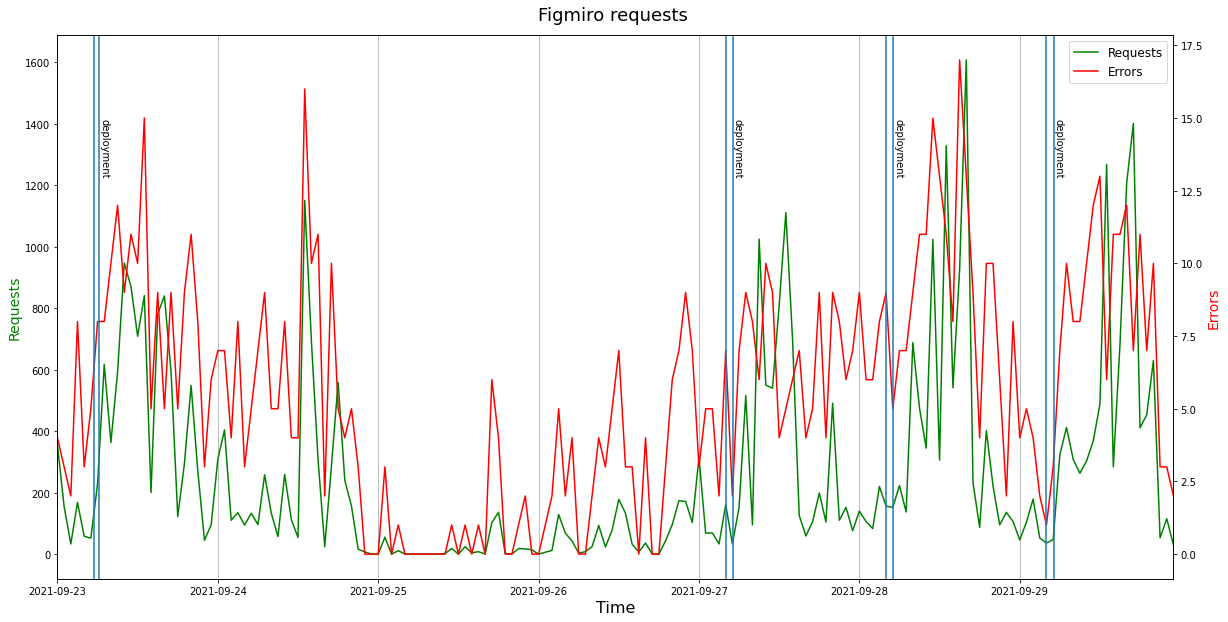

In [174]:
fig, ax1 = plt.subplots(figsize=(20,10))

ax1.set_ylabel('Requests', color='g', fontsize=14)
ax1.plot(df['Requests'], color='green', label='Requests')

ax2 = ax1.twinx()
ax2.set_ylabel('Errors', color='r', fontsize=14)
ax2.plot(df['Errors'], color='red', label='Errors')

ax1.set_title('Figmiro requests ', fontsize=18, pad=15)
ax1.set_xlabel('Time', fontsize=16)
ax2.margins(x=0)
ax2.legend([ax1.get_lines()[0], ax2.get_lines()[0]], ['Requests','Errors'], fontsize=12)
ax1.xaxis.grid()

for i in range(len(deployments_start)):
    plt.axvline(x=mdates.epoch2num(deployments_start[i]))
    
    plt.axvline(x=mdates.epoch2num(deployments_end[i]))
    plt.text(mdates.epoch2num(deployments_end[i]), 15, "deployment", rotation=270, verticalalignment='top')
plt.show()
fig.savefig("output.png", bbox_inches='tight')